In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("collected data9.6.2019/merged_data.csv", index_col=0)

In [3]:
df.shape

(37839, 260)

In [4]:
df.head()

,ladder_rank,player_id,score,time,spm,avengerKills,deaths,dogtagsTaken,extra.accuracy,extra.assignments,...,Transport UH-1Y Venom_stat.time,Soldier Equiment_stat.destroys,Soldier Equiment_stat.kills,Fast Attack Craft_extra.spm,Fast Attack Craft_stat.destroys,Fast Attack Craft_stat.kills,Fast Attack Craft_stat.score,Fast Attack Craft_stat.time,IFV BTR 90_stat.score,AA LAV-AD_stat.score
0,1,Oculus Mortis I,413158680,7310:21:40,941.95,62235,286403,3700,11,102,...,1656,316,1572,1374,215,1272,1279110,55819,4212720,1657680
1,3,xRubberDuckZ,342215383,3356:55:00,1699.06,70299,136460,898,25,60,...,80,1,12,2403,26,199,339339,8472,3163250,521279
2,4,MAGNUM MU5TACHE,341161293,6054:56:40,939.07,51888,131168,1639,11,98,...,362,274,2205,1870,1065,4005,5022300,161082,5670520,3901300
3,5,Divine Yuuko,339846192,5830:33:20,971.45,51266,166087,2394,17,98,...,46,347,1457,1329,392,4561,2396720,108134,5332080,3111560
4,7,fOOzviking,313057805,5371:50:00,976.21,51743,312395,6662,14,90,...,70,1669,3302,742,1919,21353,8367200,676027,17313300,788143


In [5]:
co = list(df.columns)
print(co)

['ladder_rank', 'player_id', 'score', 'time', 'spm', 'avengerKills', 'deaths', 'dogtagsTaken', 'extra.accuracy', 'extra.assignments', 'extra.gspm', 'extra.hkp', 'extra.kdr', 'extra.khp', 'extra.medals', 'extra.medalsUnique', 'extra.ribbons', 'extra.ribbonsUnique', 'extra.ribpr', 'extra.roundsFinished', 'extra.sfpm', 'extra.spm', 'extra.unknownKills', 'extra.vehKillsP', 'extra.vehTimeP', 'extra.vehicleKills', 'extra.vehicleTime', 'extra.weaKillsP', 'extra.weaKpm', 'extra.weaTimeP', 'extra.weaponKills', 'extra.weaponTime', 'extra.wlr', 'flagCaptures', 'flagDefend', 'headshots', 'heals', 'killAssists', 'killStreakBonus', 'kills', 'kits.assault.score', 'kits.assault.spm', 'kits.assault.stars', 'kits.assault.time', 'kits.commander.score', 'kits.commander.spm', 'kits.commander.time', 'kits.engineer.score', 'kits.engineer.spm', 'kits.engineer.stars', 'kits.engineer.time', 'kits.recon.score', 'kits.recon.spm', 'kits.recon.stars', 'kits.recon.time', 'kits.support.score', 'kits.support.spm', 'ki

In [6]:
# Create our new dataframe using the weapon and vehicle headers
df_weapon = df[['player_id', 'score', 'spm','GADGET_extra.accuracy', 'GADGET_extra.sfpm', 'GADGET_stat.hits', 'GADGET_stat.hs', 'GADGET_stat.kills', 'GADGET_stat.shots', 'GADGET_stat.time', 'SNIPER RIFLE_extra.accuracy', 'SNIPER RIFLE_extra.hkp', 'SNIPER RIFLE_extra.sfpm', 'SNIPER RIFLE_extra.spm', 'SNIPER RIFLE_stat.hits', 'SNIPER RIFLE_stat.hs', 'SNIPER RIFLE_stat.kills', 'SNIPER RIFLE_stat.score', 'SNIPER RIFLE_stat.shots', 'SNIPER RIFLE_stat.time', 'PDW_extra.accuracy', 'PDW_extra.hkp', 'PDW_extra.kpm', 'PDW_extra.sfpm', 'PDW_extra.spm', 'PDW_stat.hits', 'PDW_stat.hs', 'PDW_stat.kills', 'PDW_stat.score', 'PDW_stat.shots', 'PDW_stat.time', 'CARBINE_extra.accuracy', 'CARBINE_extra.hkp', 'CARBINE_extra.kpm', 'CARBINE_extra.sfpm', 'CARBINE_extra.spm', 'CARBINE_stat.hits', 'CARBINE_stat.hs', 'CARBINE_stat.kills', 'CARBINE_stat.score', 'CARBINE_stat.shots', 'CARBINE_stat.time', 'BATTLE PICKUP_extra.accuracy', 'BATTLE PICKUP_extra.hkp', 'BATTLE PICKUP_extra.sfpm', 'BATTLE PICKUP_stat.hits', 'BATTLE PICKUP_stat.hs', 'BATTLE PICKUP_stat.kills', 'BATTLE PICKUP_stat.shots', 'BATTLE PICKUP_stat.time', 'LMG_extra.accuracy', 'LMG_extra.hkp', 'LMG_extra.kpm', 'LMG_extra.sfpm', 'LMG_extra.spm', 'LMG_stat.hits', 'LMG_stat.hs', 'LMG_stat.kills', 'LMG_stat.score', 'LMG_stat.shots', 'LMG_stat.time', 'GRENADE_extra.accuracy', 'GRENADE_extra.kpm', 'GRENADE_extra.sfpm', 'GRENADE_extra.spm', 'GRENADE_stat.hits', 'GRENADE_stat.kills', 'GRENADE_stat.score', 'GRENADE_stat.shots', 'GRENADE_stat.time', 'DMR_extra.accuracy', 'DMR_extra.hkp', 'DMR_extra.kpm', 'DMR_extra.sfpm', 'DMR_extra.spm', 'DMR_stat.hits', 'DMR_stat.hs', 'DMR_stat.kills', 'DMR_stat.score', 'DMR_stat.shots', 'DMR_stat.time', 'ASSAULT RIFLE_extra.accuracy', 'ASSAULT RIFLE_extra.hkp', 'ASSAULT RIFLE_extra.kpm', 'ASSAULT RIFLE_extra.sfpm', 'ASSAULT RIFLE_extra.spm', 'ASSAULT RIFLE_stat.hits', 'ASSAULT RIFLE_stat.hs', 'ASSAULT RIFLE_stat.kills', 'ASSAULT RIFLE_stat.score', 'ASSAULT RIFLE_stat.shots', 'ASSAULT RIFLE_stat.time', 'KNIFE_stat.kills', 'SHOTGUN_extra.accuracy', 'SHOTGUN_extra.hkp', 'SHOTGUN_extra.kpm', 'SHOTGUN_extra.sfpm', 'SHOTGUN_extra.spm', 'SHOTGUN_stat.hits', 'SHOTGUN_stat.hs', 'SHOTGUN_stat.kills', 'SHOTGUN_stat.score', 'SHOTGUN_stat.shots', 'SHOTGUN_stat.time', 'SIDEARM_extra.accuracy', 'SIDEARM_extra.hkp', 'SIDEARM_extra.kpm', 'SIDEARM_extra.sfpm', 'SIDEARM_extra.spm', 'SIDEARM_stat.hits', 'SIDEARM_stat.hs', 'SIDEARM_stat.kills', 'SIDEARM_stat.score', 'SIDEARM_stat.shots', 'SIDEARM_stat.time']]
df_vehicle = df[['player_id', 'score', 'spm','Infantry Fighting Vehicle_stat.destroys', 'Infantry Fighting Vehicle_stat.kills', 'Infantry Fighting Vehicle_stat.time', 'Anti Air_stat.destroys', 'Anti Air_stat.kills', 'Anti Air_stat.time', 'Transport_stat.destroys', 'Transport_stat.kills', 'Transport_stat.time', 'Air Jet Stealth_extra.spm', 'Air Jet Stealth_stat.destroys', 'Air Jet Stealth_stat.kills', 'Air Jet Stealth_stat.score', 'Air Jet Stealth_stat.time', 'Air Helicopter Scout AH6_stat.score', 'Air Jet Attack_extra.spm', 'Air Jet Attack_stat.destroys', 'Air Jet Attack_stat.kills', 'Air Jet Attack_stat.score', 'Air Jet Attack_stat.time', 'Weapon Stationary _stat.destroys', 'Weapon Stationary _stat.kills', 'Weapon Stationary _stat.time', 'Boat_stat.destroys', 'Boat_stat.kills', 'Boat_stat.time', 'Air_stat.kills', 'Air_stat.time', 'Main Battle Tanks_extra.spm', 'Main Battle Tanks_stat.destroys', 'Main Battle Tanks_stat.kills', 'Main Battle Tanks_stat.score', 'Main Battle Tanks_stat.time', 'Air Helicopter Scout_stat.destroys', 'Air Helicopter Scout_stat.kills', 'Air Helicopter Scout_stat.time', 'Air Helicopter Attack_extra.spm', 'Air Helicopter Attack_stat.destroys', 'Air Helicopter Attack_stat.kills', 'Air Helicopter Attack_stat.score', 'Air Helicopter Attack_stat.time', 'Mobile Artillery_stat.destroys', 'Mobile Artillery_stat.kills', 'Mobile Artillery_stat.time', 'Transport UH-1Y Venom_stat.time', 'Soldier Equiment_stat.destroys', 'Soldier Equiment_stat.kills', 'Fast Attack Craft_extra.spm', 'Fast Attack Craft_stat.destroys', 'Fast Attack Craft_stat.kills', 'Fast Attack Craft_stat.score', 'Fast Attack Craft_stat.time', 'IFV BTR 90_stat.score', 'AA LAV-AD_stat.score']]

In [7]:
df_weapon

,player_id,score,spm,GADGET_extra.accuracy,GADGET_extra.sfpm,GADGET_stat.hits,GADGET_stat.hs,GADGET_stat.kills,GADGET_stat.shots,GADGET_stat.time,...,SIDEARM_extra.hkp,SIDEARM_extra.kpm,SIDEARM_extra.sfpm,SIDEARM_extra.spm,SIDEARM_stat.hits,SIDEARM_stat.hs,SIDEARM_stat.kills,SIDEARM_stat.score,SIDEARM_stat.shots,SIDEARM_stat.time
0,Oculus Mortis I,413158680,941.95,54,65,369950,545,23398,676493,616646,...,38,1,11,236,32907,5802,15057,2505280,124758,634908
1,xRubberDuckZ,342215383,1699.06,31,27,84600,18,5558,272254,593082,...,18,4,78,708,96572,3870,21367,3287720,363837,278557
2,MAGNUM MU5TACHE,341161293,939.07,37,39,218783,40,15018,577491,868530,...,16,3,95,603,94607,3235,19266,3094540,490377,307752
3,Divine Yuuko,339846192,971.45,49,60,381919,95,19382,770637,764017,...,15,5,85,888,172430,7043,44655,6747220,650830,455612
4,fOOzviking,313057805,976.21,35,33,410121,277,60429,1171206,2115167,...,15,3,81,405,126550,4591,30467,3844890,776536,569205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37834,halogamer521,10033,113.90,12,19,37,0,13,285,862,...,17,0,18,91,295,9,52,9252,1883,6070
37835,KillZoNe981,10028,58.58,15,19,18,0,2,119,373,...,33,0,14,19,21,1,3,325,234,997
37836,Moshkilll,10026,149.38,6,10,21,0,3,309,1728,...,0,1,9,0,5,0,3,0,27,165
37837,tewdz,10021,372.53,0,0,0,0,0,0,2,...,0,4,41,400,9,0,3,300,31,45


In [8]:
df_vehicle

,player_id,score,spm,Infantry Fighting Vehicle_stat.destroys,Infantry Fighting Vehicle_stat.kills,Infantry Fighting Vehicle_stat.time,Anti Air_stat.destroys,Anti Air_stat.kills,Anti Air_stat.time,Transport_stat.destroys,...,Transport UH-1Y Venom_stat.time,Soldier Equiment_stat.destroys,Soldier Equiment_stat.kills,Fast Attack Craft_extra.spm,Fast Attack Craft_stat.destroys,Fast Attack Craft_stat.kills,Fast Attack Craft_stat.score,Fast Attack Craft_stat.time,IFV BTR 90_stat.score,AA LAV-AD_stat.score
0,Oculus Mortis I,413158680,941.95,1235,7590,306837,1063,3707,141471,119,...,1656,316,1572,1374,215,1272,1279110,55819,4212720,1657680
1,xRubberDuckZ,342215383,1699.06,707,6306,200243,220,1082,34204,6,...,80,1,12,2403,26,199,339339,8472,3163250,521279
2,MAGNUM MU5TACHE,341161293,939.07,1801,10936,460848,2559,8125,355519,76,...,362,274,2205,1870,1065,4005,5022300,161082,5670520,3901300
3,Divine Yuuko,339846192,971.45,1441,13528,340940,2198,7424,231635,81,...,46,347,1457,1329,392,4561,2396720,108134,5332080,3111560
4,fOOzviking,313057805,976.21,3032,42286,1276753,668,1436,94217,281,...,70,1669,3302,742,1919,21353,8367200,676027,17313300,788143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37834,halogamer521,10033,113.90,0,3,146,0,0,0,0,...,0,0,0,0,0,0,0,0,635,0
37835,KillZoNe981,10028,58.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37836,Moshkilll,10026,149.38,0,2,775,0,0,56,0,...,0,0,0,1036,0,0,5320,308,6942,19
37837,tewdz,10021,372.53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_weapon_1 = df_weapon.drop(['player_id'], axis = 1)
df_weapon_stats = df_weapon_1.describe().astype(float).applymap('{:,.2f}'.format)

In [10]:
pd.set_option('display.max_rows', 144)
df_weapon_stats.T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
score,"7,643,318.65","20,340,082.30","10,005.00","72,888.50","503,531.00","5,329,172.00","413,158,680.00"
spm,423.82,314.85,23.96,227.42,347.54,540.18,"13,023.64"
GADGET_extra.accuracy,23.78,16.60,0.00,12.00,22.00,32.00,400.00
GADGET_extra.sfpm,29.26,31.47,0.00,13.00,20.00,34.00,852.00
GADGET_stat.hits,"10,618.87","60,380.95",0.00,26.00,310.00,"2,928.00","3,290,399.00"
GADGET_stat.hs,3.20,20.41,0.00,0.00,0.00,1.00,"1,845.00"
GADGET_stat.kills,669.39,"3,076.36",0.00,4.00,33.00,285.00,"151,623.00"
GADGET_stat.shots,"25,531.90","108,943.86",0.00,201.00,"1,455.00","11,224.00","3,911,869.00"
GADGET_stat.time,"43,064.62","139,017.85",0.00,623.00,"3,490.00","26,231.00","5,494,766.00"
SNIPER RIFLE_extra.accuracy,22.90,11.71,0.00,17.00,24.00,30.00,100.00


In [11]:
# regarding weapons, there are a few stats which I'd like to look at individually
# they are accuracy, kills, hs, spm, time

In [12]:
# create function that exclude entries in list containing dots
def exclude_dot(i):
        if('accuracy' in i):
            return(True)
        else:
            return(False)
co = list(df_weapon_1.columns)
filtered = filter(exclude_dot, co)

co = []
for s in filtered: 
    co.append(s)

# Create our new dataframe using the general stats header
df_weapon_accu = df_weapon_1[co]
df_weapon_accu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37839 entries, 0 to 37838
Data columns (total 11 columns):
GADGET_extra.accuracy           37839 non-null int64
SNIPER RIFLE_extra.accuracy     37839 non-null int64
PDW_extra.accuracy              37839 non-null int64
CARBINE_extra.accuracy          37839 non-null int64
BATTLE PICKUP_extra.accuracy    37839 non-null int64
LMG_extra.accuracy              37839 non-null int64
GRENADE_extra.accuracy          37839 non-null int64
DMR_extra.accuracy              37839 non-null int64
ASSAULT RIFLE_extra.accuracy    37839 non-null int64
SHOTGUN_extra.accuracy          37839 non-null int64
SIDEARM_extra.accuracy          37839 non-null int64
dtypes: int64(11)
memory usage: 3.5 MB


In [13]:
df_weapon_accu.describe().T.drop('count',axis = 1)

,mean,std,min,25%,50%,75%,max
GADGET_extra.accuracy,23.779989,16.595930,0.0,12.0,22.0,32.0,400.0
SNIPER RIFLE_extra.accuracy,22.898914,11.706382,0.0,17.0,24.0,30.0,100.0
PDW_extra.accuracy,10.846957,5.570898,0.0,8.0,12.0,14.0,100.0
CARBINE_extra.accuracy,10.556199,12.765316,0.0,5.0,12.0,15.0,1100.0
BATTLE PICKUP_extra.accuracy,20.805941,24.885671,0.0,0.0,20.0,32.0,600.0
LMG_extra.accuracy,8.377441,4.906471,0.0,6.0,8.0,11.0,100.0
GRENADE_extra.accuracy,26.538413,23.813142,0.0,13.0,22.0,34.0,380.0
DMR_extra.accuracy,12.049182,10.597274,0.0,0.0,14.0,19.0,114.0
ASSAULT RIFLE_extra.accuracy,26.905811,2881.314788,0.0,10.0,12.0,15.0,560492.0
SHOTGUN_extra.accuracy,39.551045,37.021171,0.0,0.0,45.0,68.0,400.0


In [14]:
ar_accu = df_weapon_accu['ASSAULT RIFLE_extra.accuracy'][df_weapon_accu['ASSAULT RIFLE_extra.accuracy'] != 0]

In [15]:
np.percentile(ar_accu, [10, 90])

array([ 7., 17.])

In [16]:
ar_accu_2 = ar_accu[(ar_accu >= 7) & (ar_accu <= 17)]

In [17]:
ar_accu_2 = pd.DataFrame(ar_accu_2.describe().drop('count')).applymap('{:,.2f}'.format)

In [18]:
ar_accu_2 = ar_accu_2.T
ar_accu_2

,mean,std,min,25%,50%,75%,max
ASSAULT RIFLE_extra.accuracy,12.32,2.69,7.00,10.00,12.00,14.00,17.00


In [19]:
weapons_accuracy = pd.DataFrame()

In [20]:
for i in df_weapon_accu:
    tmp = df_weapon_accu[i][df_weapon_accu[i] != 0]
    x = np.percentile(tmp, [10])
    y = np.percentile(tmp, [90])
    t = tmp[(tmp >= int(x)) & (tmp <= int(y))]
    t = pd.DataFrame(t.describe().drop('count'))
    t = t.T
    weapons_accuracy = weapons_accuracy.append(t)

In [21]:
weapons_accuracy.applymap('{:,.2f}'.format)

,mean,std,min,25%,50%,75%,max
GADGET_extra.accuracy,23.64,9.88,7.00,16.00,23.00,31.00,46.00
SNIPER RIFLE_extra.accuracy,24.79,5.44,14.00,21.00,25.00,29.00,35.00
PDW_extra.accuracy,11.91,2.97,6.00,10.00,12.00,14.00,17.00
CARBINE_extra.accuracy,12.83,2.88,7.00,11.00,13.00,15.00,18.00
BATTLE PICKUP_extra.accuracy,28.14,8.46,13.00,22.00,28.00,34.00,48.00
LMG_extra.accuracy,9.06,2.50,5.00,7.00,9.00,11.00,14.00
GRENADE_extra.accuracy,24.78,10.54,9.00,16.00,23.00,32.00,51.00
DMR_extra.accuracy,17.55,3.88,10.00,15.00,18.00,20.00,25.00
ASSAULT RIFLE_extra.accuracy,12.32,2.69,7.00,10.00,12.00,14.00,17.00
SHOTGUN_extra.accuracy,63.91,13.89,38.00,53.00,63.00,75.00,93.00


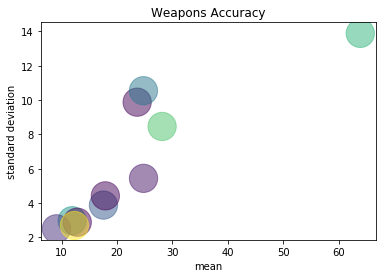

In [22]:
colors = np.random.rand(len(weapons_accuracy))
_ = plt.scatter(weapons_accuracy['mean'],weapons_accuracy['std'],c=colors, alpha=0.5, s=800)
_ = plt.ylabel('standard deviation')
_ = plt.xlabel('mean')
_ = plt.title('Weapons Accuracy')

Based on accuracy alone:

1. Shotguns have the highest average accuracy, but a high std, which means,this weapon takes a lot of effort to master;

2. LMG is the worst weapon in terms of accuracy;

3. The best and most stable weapon seems to be SNIPER RIFLE, with low standard deviation and a relatively high accuracy;

4. Hypothesis:CARBINES are in general better than ASSAULT RIFLES; (will be proven below using t-test)

In [23]:
cr_accu = df_weapon_accu['CARBINE_extra.accuracy'][df_weapon_accu['CARBINE_extra.accuracy'] != 0]

In [24]:
np.percentile(cr_accu, [10, 90])

array([ 7., 18.])

In [25]:
ar_accu_3 = ar_accu[(ar_accu >= 7) & (ar_accu <= 17)]
cr_accu_3 = cr_accu[(cr_accu >= 7) & (cr_accu <= 18)]

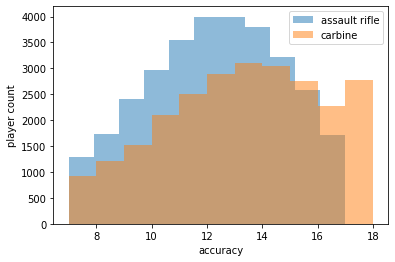

In [26]:
_ = plt.hist(ar_accu_3, bins = 11, alpha=0.5, label='assault rifle')
_ = plt.hist(cr_accu_3, bins = 11,alpha=0.5, label='carbine')
_ = plt.xlabel('accuracy')
_ = plt.ylabel('player count')
_ = plt.legend()

In [27]:
# use the student t-test to compare assault rifle accuracy and carbines
from scipy.stats import ttest_ind
ttest_ind(ar_accu_3,cr_accu_3)

Ttest_indResult(statistic=-21.71692396390152, pvalue=3.8026573725064386e-104)

The null hypothesis for our t-test is H0: There is no statistically significant difference between the carbine and assult rifle accuracy.

Based on the pvalue, we reject H0 and conclude that there is a significant difference in terms of accuracy between the two weapons

Continuing on, we want to look at weapon preferences and see if there is significant difference in weapon usage between the top 25% of players and the bottom 75% of players. We've excluded extremes on both sides before we research the subject and will eventually use chi-square goodness of fit test to see if our null hypothesis can be rejected. 

In [28]:
weapons_data = pd.DataFrame()
for i in df_weapon_1:
    tmp = df_weapon_1[i]
    x = np.percentile(tmp, [10])
    y = np.percentile(tmp, [90])
    t = tmp[(tmp >= int(x)) & (tmp <= int(y))]
    t = pd.DataFrame(t)
    t = t.T
    weapons_data = weapons_data.append(t)

In [29]:
weapons_data = weapons_data.T

In [30]:
co = list(weapons_data.columns)

# create function that exclude entries in list containing dots
def score_column(i):
        if('score' in i):
            return(True)
        else:
            return(False)
        
# utilize filter to filter out headers containing general stats
filtered = filter(score_column, co)

# add the filtered values into blank list
co = []
for s in filtered: 
    co.append(s)

# print out the basic stats data that we are going to work with
print(co)

['score', 'SNIPER RIFLE_stat.score', 'PDW_stat.score', 'CARBINE_stat.score', 'LMG_stat.score', 'GRENADE_stat.score', 'DMR_stat.score', 'ASSAULT RIFLE_stat.score', 'SHOTGUN_stat.score', 'SIDEARM_stat.score']


In [31]:
weapons_data_score = weapons_data[co]
weapons_data_score = weapons_data_score.dropna(subset = ['score'])

In [32]:
weapons_data_score.head()

,score,SNIPER RIFLE_stat.score,PDW_stat.score,CARBINE_stat.score,LMG_stat.score,GRENADE_stat.score,DMR_stat.score,ASSAULT RIFLE_stat.score,SHOTGUN_stat.score,SIDEARM_stat.score
3784,20760482.0,NaN,194828.0,NaN,NaN,NaN,NaN,440660.0,NaN,NaN
3785,20754396.0,NaN,132750.0,188596.0,NaN,36395.0,NaN,437376.0,NaN,205882.0
3786,20754091.0,28096.0,31559.0,21696.0,36142.0,5980.0,19278.0,97235.0,20954.0,49786.0
3787,20748602.0,209892.0,31441.0,446739.0,NaN,24991.0,NaN,272686.0,117226.0,119046.0
3788,20725519.0,53805.0,NaN,NaN,240591.0,NaN,NaN,NaN,NaN,NaN


In [33]:
np.percentile(weapons_data_score.score, [0, 75])

array([  22865., 3473117.])

In [34]:
weapons_data_score_25 = weapons_data_score[(weapons_data_score.score > 3473117)]
weapons_data_score_b25 = weapons_data_score[(weapons_data_score.score <= 3473117)]

In [35]:
weapons_data_score_25_sum = weapons_data_score_25.sum()
weapons_data_score_b25_sum = weapons_data_score_b25.sum()

In [36]:
top25 = weapons_data_score_25_sum.drop('score')/sum(weapons_data_score_25_sum.drop('score'))*100
top25 = round(top25,0)
top25

SNIPER RIFLE_stat.score     11.0
PDW_stat.score               9.0
CARBINE_stat.score          20.0
LMG_stat.score              12.0
GRENADE_stat.score           3.0
DMR_stat.score               6.0
ASSAULT RIFLE_stat.score    23.0
SHOTGUN_stat.score           7.0
SIDEARM_stat.score          11.0
dtype: float64

In [37]:
bottom75 = weapons_data_score_b25_sum.drop('score')/sum(weapons_data_score_b25_sum.drop('score'))*100
bottom75 = round(bottom75,0)
bottom75

SNIPER RIFLE_stat.score     12.0
PDW_stat.score               9.0
CARBINE_stat.score          15.0
LMG_stat.score              10.0
GRENADE_stat.score           2.0
DMR_stat.score               6.0
ASSAULT RIFLE_stat.score    30.0
SHOTGUN_stat.score           6.0
SIDEARM_stat.score          10.0
dtype: float64

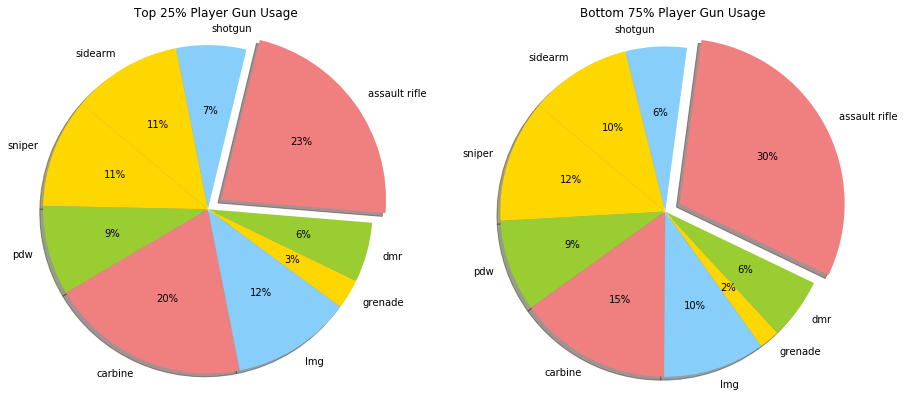

In [38]:
labels = 'sniper', 'pdw', 'carbine', 'lmg','grenade','dmr','assault rifle','shotgun','sidearm'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Data to plot
sizes = top25
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0)  

# Data to plot
sizes_2 = bottom75
explode_2 = (0, 0, 0, 0, 0, 0, 0.1, 0, 0)  


plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
_ = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140)
_ = plt.axis('equal')
_ = plt.title('Top 25% Player Gun Usage')

plt.subplot(2, 2, 2)
_ = plt.pie(sizes_2, explode=explode_2, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140)
_ = plt.axis('equal')
_ = plt.title('Bottom 75% Player Gun Usage')


In [39]:
import scipy.stats as stats
stats.chisquare(f_obs= top25,   # Array of observed counts
                f_exp= bottom75)   # Array of expected counts

Power_divergenceResult(statistic=4.55, pvalue=0.804410169231813)

Since our data shows that pvalue is 0.80, it suggests that there isn't a significant difference between top 25% of players and bottom 75% in terms of gun preference. Both groups have similar proportions of players choosing one gun type over the other. 

Final Question: which weapon gets the most kills per minute(kpm) and score per minute(spm)

In [40]:
# create function that exclude entries in list containing dots
def spm_dot(i):
        if('spm' in i):
            return(True)
        else:
            return(False)
co = list(weapons_data.columns)
filtered = filter(spm_dot, co)

co = []
for s in filtered: 
    co.append(s)

# Create our new dataframe using the general stats header
weapons_data2 = weapons_data[co]
weapons_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37839 entries, 0 to 37838
Data columns (total 10 columns):
spm                        30327 non-null float64
SNIPER RIFLE_extra.spm     34059 non-null float64
PDW_extra.spm              34088 non-null float64
CARBINE_extra.spm          34101 non-null float64
LMG_extra.spm              34085 non-null float64
GRENADE_extra.spm          34059 non-null float64
DMR_extra.spm              34089 non-null float64
ASSAULT RIFLE_extra.spm    30372 non-null float64
SHOTGUN_extra.spm          34056 non-null float64
SIDEARM_extra.spm          30302 non-null float64
dtypes: float64(10)
memory usage: 3.2 MB


In [41]:
weapons_spm = pd.DataFrame()

In [42]:
for i in weapons_data2:
    tmp = weapons_data2[i][weapons_data2[i] != 0]
    weapons_spm = weapons_spm.append(tmp)

In [43]:
weapons_spm.T.describe()

,spm,SNIPER RIFLE_extra.spm,PDW_extra.spm,CARBINE_extra.spm,LMG_extra.spm,GRENADE_extra.spm,DMR_extra.spm,ASSAULT RIFLE_extra.spm,SHOTGUN_extra.spm,SIDEARM_extra.spm
count,30327.000000,30037.000000,29554.000000,25261.000000,29409.000000,28534.000000,20667.000000,30372.000000,19527.000000,30302.000000
mean,379.590932,59.764191,110.607701,121.398203,111.743072,504.591189,112.353752,123.790761,208.104573,126.429114
std,157.161222,34.827671,61.372081,57.819984,60.024619,252.509845,51.052238,56.669700,99.585866,66.286896
min,157.010000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,37.000000,1.000000,26.000000
25%,247.785000,32.000000,61.000000,77.000000,64.000000,305.000000,73.000000,78.000000,131.000000,72.000000
50%,346.890000,54.000000,102.000000,117.000000,105.000000,472.000000,109.000000,114.000000,197.000000,116.000000
75%,490.650000,84.000000,155.000000,164.000000,155.000000,679.000000,150.000000,163.000000,277.000000,172.000000
max,759.960000,145.000000,254.000000,247.000000,251.000000,1113.000000,221.000000,263.000000,445.000000,290.000000


In [44]:
weapon_spm = weapons_spm.T.describe()
mean_spm = weapon_spm.iloc[[1]]
weapon_spm

,spm,SNIPER RIFLE_extra.spm,PDW_extra.spm,CARBINE_extra.spm,LMG_extra.spm,GRENADE_extra.spm,DMR_extra.spm,ASSAULT RIFLE_extra.spm,SHOTGUN_extra.spm,SIDEARM_extra.spm
count,30327.000000,30037.000000,29554.000000,25261.000000,29409.000000,28534.000000,20667.000000,30372.000000,19527.000000,30302.000000
mean,379.590932,59.764191,110.607701,121.398203,111.743072,504.591189,112.353752,123.790761,208.104573,126.429114
std,157.161222,34.827671,61.372081,57.819984,60.024619,252.509845,51.052238,56.669700,99.585866,66.286896
min,157.010000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,37.000000,1.000000,26.000000
25%,247.785000,32.000000,61.000000,77.000000,64.000000,305.000000,73.000000,78.000000,131.000000,72.000000
50%,346.890000,54.000000,102.000000,117.000000,105.000000,472.000000,109.000000,114.000000,197.000000,116.000000
75%,490.650000,84.000000,155.000000,164.000000,155.000000,679.000000,150.000000,163.000000,277.000000,172.000000
max,759.960000,145.000000,254.000000,247.000000,251.000000,1113.000000,221.000000,263.000000,445.000000,290.000000


In [45]:
mean_spm = mean_spm.drop(columns=['spm'])

In [46]:
spm_rounded = np.array(round(mean_spm,0))

In [47]:
performance = []
for i in spm_rounded[0]:
    performance.append(i)

In [48]:
performance

[60.0, 111.0, 121.0, 112.0, 505.0, 112.0, 124.0, 208.0, 126.0]

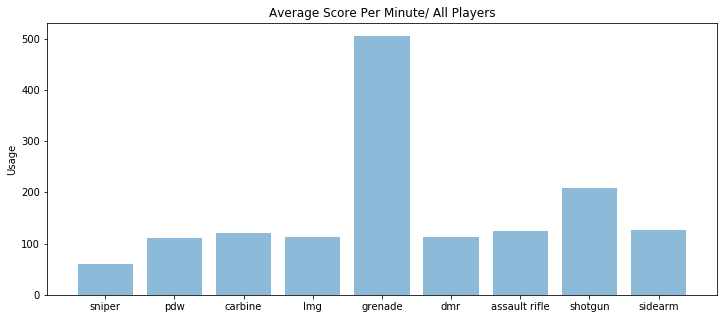

In [49]:
objects = ('sniper', 'pdw', 'carbine', 'lmg','grenade','dmr','assault rifle','shotgun','sidearm')
y_pos = np.arange(len(objects))

plt.figure(figsize=(12, 5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Average Score Per Minute/ All Players')

plt.show()